In [1]:
# importing the necessary packages

# packages used for training
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd

# package used for POS-taggingh
from spacy.es import Spanish

# packages used for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# packages used for visualization
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# loads the text and labels
with open('../data/train/es.text') as f:
    esp_text = f.readlines()

with open('../data/train/es.labels') as f:
    esp_labels = f.readlines()

In [3]:
# asserts that the number of tweets and labels are equal
assert len(esp_text) == len(esp_labels)

In [4]:
esp_text = [tweet.strip() for tweet in esp_text]
esp_labels = [int(label.strip()) for label in esp_labels]

In [5]:
np.random.seed(42)
np.random.shuffle(esp_text)
np.random.seed(42)
np.random.shuffle(esp_labels)

## Baseline

In [6]:
# pipeline used to gather counts of all words in the dataset and vectorizes each document using CountVectorizer;
# predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('count', CountVectorizer()),
                 ('clf', MultinomialNB())])

In [7]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.25552066  0.25545818  0.25767555  0.25694304  0.25577859]
Accuracy: 0.26 (+/- 0.00)


In [8]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[16288  2347   593    71    87    22    22     4     7   219     7     4
      1     1     1     1     5     1     2]
 [ 8691  3698   736    39   113    13    28     4    10   149    12     4
      1     2     0     1     2     1     1]
 [ 4343  1330  3345    18    92     7    54    14     6    25     3     1
      1     4     1     0     6     0     3]
 [ 5848   583   194    70    20     7     7     2     2    30     2     0
      1     0     0     1     2     0     0]
 [ 4239  1328   469    11   257    13    31     7     6    67     5     2
      0     3     0     0     2     1     3]
 [ 3437   498   286    23    47    64    10     5     2    12     1     0
      0     2     0     0     0     0     0]
 [ 2187   453   528    26    91     6   510     4     4    18     0     1
      1     3     0     0     0     0     1]
 [ 2241   630   584     9    85     7    31    45     2    11     2     0
      0     1     0     2     1     0     0]
 [ 2421   616   291    24    68     2    28     

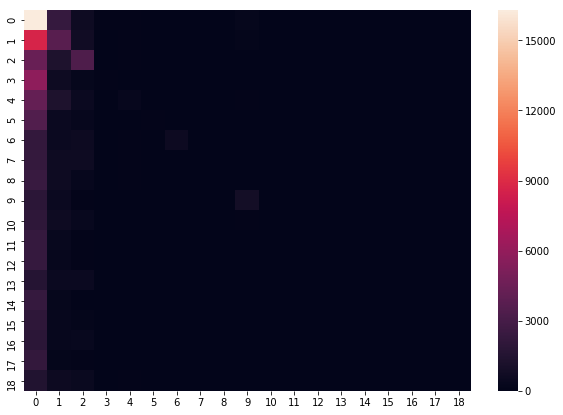

In [9]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [10]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.23      0.83      0.36     19683
          1       0.24      0.27      0.26     13505
          2       0.37      0.36      0.36      9253
          3       0.17      0.01      0.02      6769
          4       0.23      0.04      0.07      6444
          5       0.38      0.01      0.03      4387
          6       0.61      0.13      0.22      3833
          7       0.42      0.01      0.02      3651
          8       0.24      0.01      0.01      3501
          9       0.51      0.26      0.34      3370
         10       0.46      0.01      0.02      3125
         11       0.42      0.00      0.01      2907
         12       0.47      0.00      0.00      2786
         13       0.56      0.01      0.02      2694
         14       0.00      0.00      0.00      2613
         15       0.58      0.01      0.01      2537
         16       0.52      0.01      0.02      2583
         17       0.38      0.00      0.00   

## Feature normalization using tf-idf

In [11]:
# pipeline used to gather counts of all words in the dataset normalized with tf-idf and vectorizes each document 
# using TfidfVectorizer; predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', MultinomialNB())])

In [12]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.21834481  0.21898587  0.21871517  0.21685587  0.21907948]
Accuracy: 0.22 (+/- 0.00)


In [13]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[18826   794    57     1     1     0     3     0     0     1     0     0
      0     0     0     0     0     0     0]
 [11798  1602    99     1     0     0     0     0     0     5     0     0
      0     0     0     0     0     0     0]
 [ 7687   615   941     0     2     0     8     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 6573   168    22     5     1     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 5845   505    69     1    24     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 4169   160    47     0     0    10     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3446   193    98     1     1     0    94     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3340   216    82     0     0     0     4     9     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3207   251    42     1     0     0     0     

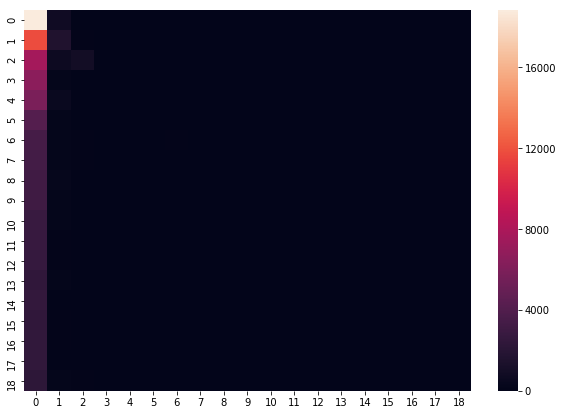

In [14]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [15]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.21      0.96      0.34     19683
          1       0.28      0.12      0.17     13505
          2       0.54      0.10      0.17      9253
          3       0.42      0.00      0.00      6769
          4       0.80      0.00      0.01      6444
          5       1.00      0.00      0.00      4387
          6       0.80      0.02      0.05      3833
          7       1.00      0.00      0.00      3651
          8       0.00      0.00      0.00      3501
          9       0.82      0.01      0.02      3370
         10       1.00      0.00      0.00      3125
         11       0.00      0.00      0.00      2907
         12       0.00      0.00      0.00      2786
         13       1.00      0.00      0.00      2694
         14       0.00      0.00      0.00      2613
         15       0.00      0.00      0.00      2537
         16       0.00      0.00      0.00      2583
         17       0.00      0.00      0.00   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## tf-idf and part-of-speech tagging

In [16]:
# loads the spaCy Spanish parser
parser = Spanish()

In [17]:
# tokenizes an input tweet using the spaCy Spanish parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [19]:
# pipeline used to gather counts of all words labeled with POS in the dataset normalized with tf-idf 
# and vectorizes each document using TfidfVectorizer; predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize)),
                 ('clf', MultinomialNB())])

In [20]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.2201175   0.21888455  0.21962712  0.21918711  0.21902879]
Accuracy: 0.22 (+/- 0.00)


In [21]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[19289   363    31     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [11903  1525    77     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 7898   579   776     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 6603   146    12     8     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 5915   475    44     0     9     0     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 4184   153    39     1     0     9     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3517   233    53     0     1     0    29     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3356   223    69     2     0     0     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3238   234    28     1     0     0     0     

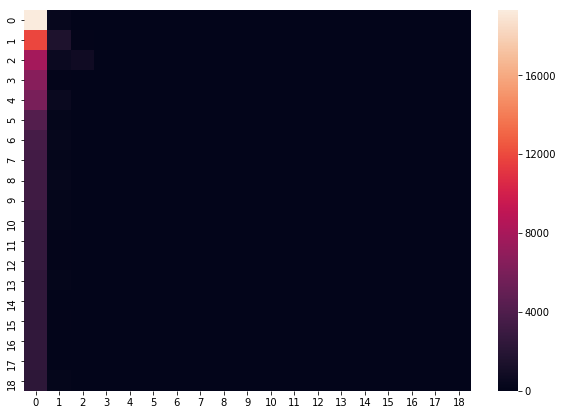

In [22]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [23]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.21      0.98      0.35     19683
          1       0.29      0.11      0.16     13505
          2       0.59      0.08      0.15      9253
          3       0.57      0.00      0.00      6769
          4       0.90      0.00      0.00      6444
          5       1.00      0.00      0.00      4387
          6       0.91      0.01      0.02      3833
          7       0.00      0.00      0.00      3651
          8       0.00      0.00      0.00      3501
          9       0.75      0.00      0.00      3370
         10       0.00      0.00      0.00      3125
         11       0.00      0.00      0.00      2907
         12       0.00      0.00      0.00      2786
         13       0.00      0.00      0.00      2694
         14       0.00      0.00      0.00      2613
         15       0.00      0.00      0.00      2537
         16       0.00      0.00      0.00      2583
         17       0.00      0.00      0.00   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## tf-idf and bi-grams

In [24]:
# pipeline used to gather counts of bi-grams in the dataset normalized with tf-idf and vectorizes each document 
# using TfidfVectorizer; predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                 ('clf', MultinomialNB())])

In [25]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.21272285  0.21447748  0.21461141  0.21300426  0.21335158]
Accuracy: 0.21 (+/- 0.00)


In [26]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[19131   515    33     0     0     0     1     0     0     3     0     0
      0     0     0     0     0     0     0]
 [12190  1254    57     1     0     0     1     0     0     2     0     0
      0     0     0     0     0     0     0]
 [ 8326   349   578     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 6648   111     5     5     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 6095   302    29     0    18     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 4252    88    37     0     0     9     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3649   102    34     0     1     0    47     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3471   133    41     0     0     0     2     4     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3311   172    17     0     0     0     1     

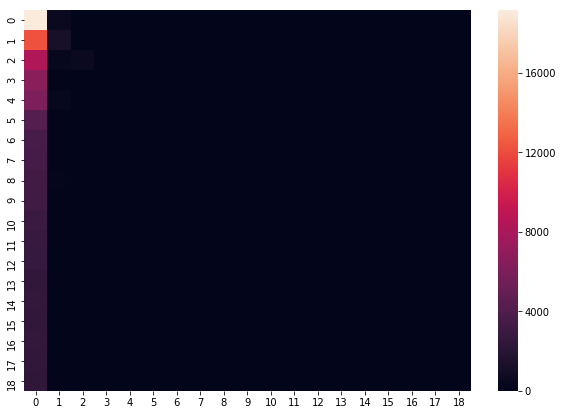

In [27]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [28]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.20      0.97      0.34     19683
          1       0.32      0.09      0.14     13505
          2       0.60      0.06      0.11      9253
          3       0.71      0.00      0.00      6769
          4       0.86      0.00      0.01      6444
          5       1.00      0.00      0.00      4387
          6       0.89      0.01      0.02      3833
          7       1.00      0.00      0.00      3651
          8       0.00      0.00      0.00      3501
          9       0.83      0.01      0.02      3370
         10       0.00      0.00      0.00      3125
         11       0.00      0.00      0.00      2907
         12       0.00      0.00      0.00      2786
         13       1.00      0.00      0.01      2694
         14       0.00      0.00      0.00      2613
         15       0.00      0.00      0.00      2537
         16       0.00      0.00      0.00      2583
         17       0.00      0.00      0.00   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## tf-idf, bi-grams and part-of-speech tagging

In [29]:
# loads the spaCy Spanish parser
parser = Spanish()

In [30]:
# tokenizes an input tweet using the spaCy Spanish parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [32]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('clf', MultinomialNB())])

In [33]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.21763574  0.21888455  0.21790455  0.21746402  0.2171026 ]
Accuracy: 0.22 (+/- 0.00)


In [34]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[19364   293    24     1     0     0     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [11982  1463    56     1     0     0     0     0     0     3     0     0
      0     0     0     0     0     0     0]
 [ 8291   413   547     0     0     0     2     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 6632   123     7     7     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 5984   409    38     0    12     0     0     0     0     1     0     0
      0     0     0     0     0     0     0]
 [ 4239   111    26     0     0     9     1     0     0     1     0     0
      0     0     0     0     0     0     0]
 [ 3608   161    29     0     2     0    33     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3429   171    49     1     0     0     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [ 3309   172    19     1     0     0     0     

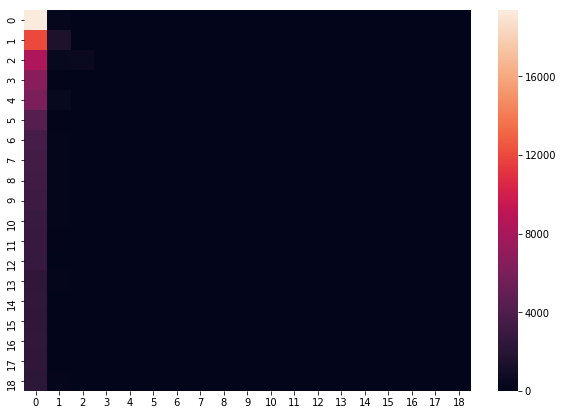

In [35]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [36]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.21      0.98      0.34     19683
          1       0.34      0.11      0.16     13505
          2       0.60      0.06      0.11      9253
          3       0.64      0.00      0.00      6769
          4       0.75      0.00      0.00      6444
          5       1.00      0.00      0.00      4387
          6       0.87      0.01      0.02      3833
          7       0.00      0.00      0.00      3651
          8       0.00      0.00      0.00      3501
          9       0.86      0.02      0.03      3370
         10       0.00      0.00      0.00      3125
         11       0.00      0.00      0.00      2907
         12       0.00      0.00      0.00      2786
         13       1.00      0.00      0.00      2694
         14       0.00      0.00      0.00      2613
         15       0.00      0.00      0.00      2537
         16       0.00      0.00      0.00      2583
         17       0.00      0.00      0.00   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## tf-idf, bi-grams and part-of-speech tagging with balanced dataset

In [37]:
# puts the English text and labels data into a pandas DataFrame
esp_data_df = pd.DataFrame([esp_text, esp_labels]).transpose()
esp_data_df.columns = (['text', 'label'])

In [39]:
# collects a random sample of each category based on the frequency of the least common set
# e.g. category 18 has 2508 items, so a sample of 2508 tweets from each category
esp_data_balanced = pd.concat([esp_data_df[esp_data_df.label == i].sample(2508) for i in range(0,19)])
esp_data_balanced

,text,label
42311,"""Yo solo tengo ojos pa usted relájate despreoc...",0
70245,Quédate. @ Ciudad Monumental De Cáceres,0
1507,"Por tenerte y nunca faltarme @ Mya-Umbracle, V...",0
87614,Sois las mejores mis shicasss @ Recinto Ferial...,0
49471,Trabajando desde el paraíso #Tm #MardePulpi #T...,0
61651,"Importancia a lo importante @ Madrid, Spain",0
12496,Visión Maps De trabajo con ilusión y corazón ️...,0
27186,"Jueves domingoso de flores @ Granada, Spain",0
29817,"Si no te quieres a ti misma, nadie más lo hará...",0
2800,Una imagen vale más que mil palabras. #Spain #...,0


In [40]:
# takes the data from the eng_data_balanced DataFrame and converts the text/labels into Python arrays
esp_text_balanced = esp_data_balanced['text'].tolist()
esp_labels_balanced = esp_data_balanced['label'].tolist()

In [41]:
# asserts that the number of tweets and labels are equal
assert len(esp_text_balanced) == len(esp_labels_balanced)

In [42]:
# shuffle the dataset with the same seed
np.random.seed(42)
np.random.shuffle(esp_text_balanced)
np.random.seed(42)
np.random.shuffle(esp_labels_balanced)

In [43]:
# loads the spaCy Spanish parser
parser = Spanish()

In [44]:
# tokenizes an input tweet using the spaCy Spanish parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [46]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('clf', MultinomialNB())])

In [47]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text_balanced, esp_labels_balanced, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.21660726  0.22300273  0.22803523  0.21745982  0.21819519]
Accuracy: 0.22 (+/- 0.01)


In [48]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
y_pred = cross_val_predict(pipe,esp_text_balanced,esp_labels_balanced,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels_balanced,y_pred)
print(conf_mat)

[[ 982   67   29  135   43  122   37   51   70  207   43   53   85   27
   178   55  119  187   18]
 [  62  239   96  135  118  226   91  106  105  380   70   79   93   76
   149   61  168  126  128]
 [  27   64  571   62   89  153  151  167   86  196   77   42   51  149
    57   45  328   54  139]
 [ 100   66   33  307   54  180   60   63  108  204   50  110  146   20
   301  130  210  335   31]
 [  44   90   86  108  231  231  146  163  144  335   77   55   50  105
   137   79  161   75  191]
 [  59   82   90  156  101  666  100   97  124  170   61   55   88   68
   165   54  151  159   62]
 [  22   27   77   54   68  126  985  118   99  173   64   54   48   67
    91   98  153   68  116]
 [  20   55  167   54  130  193  164  346  104  210   68   45   47  145
   115  135  305   67  138]
 [  41   53   74   94  119  151  155  103  460  314  134   63   81   70
   140  112  149   90  105]
 [  12   26   25   13   32   39   60   52   30 1919   59   33   12   19
    23   39   57   27   31]


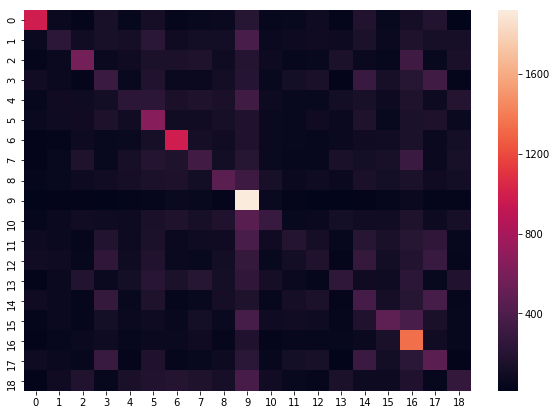

In [49]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [50]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels_balanced, y_pred))

             precision    recall  f1-score   support

          0       0.53      0.39      0.45      2508
          1       0.18      0.10      0.12      2508
          2       0.29      0.23      0.25      2508
          3       0.12      0.12      0.12      2508
          4       0.14      0.09      0.11      2508
          5       0.19      0.27      0.22      2508
          6       0.35      0.39      0.37      2508
          7       0.16      0.14      0.15      2508
          8       0.21      0.18      0.19      2508
          9       0.28      0.77      0.41      2508
         10       0.19      0.12      0.15      2508
         11       0.14      0.08      0.10      2508
         12       0.11      0.07      0.08      2508
         13       0.17      0.10      0.12      2508
         14       0.12      0.14      0.13      2508
         15       0.22      0.19      0.20      2508
         16       0.27      0.53      0.36      2508
         17       0.16      0.19      0.17   